# This part is linear regression result and ML methods results by using orginal data set.

## you can just skip the following steps, see the results from the end to beginning.

In [1]:
import numpy as np
import pandas as pd
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import warnings
warnings.filterwarnings(action="ignore")
np.random.seed(42)
from sklearn.metrics import mean_squared_error
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [2]:
r_estate= pd.read_csv("./Real estate.csv")
r_estate.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
r_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [4]:
r_estate.set_index('No',drop=True,inplace=True)

In [5]:
r_estate.head() 

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:
r_estate.describe() 

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


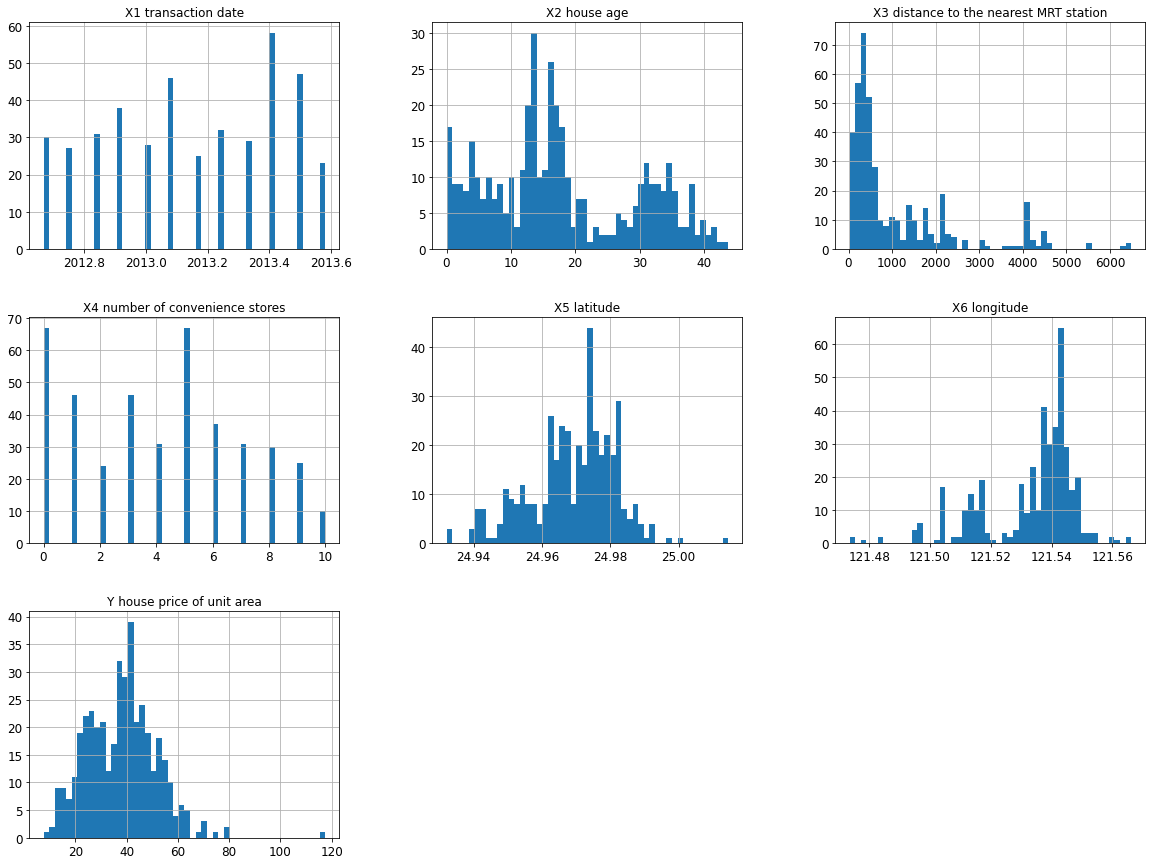

In [7]:
r_estate.hist(bins=50, figsize=(20,15))
plt.show()

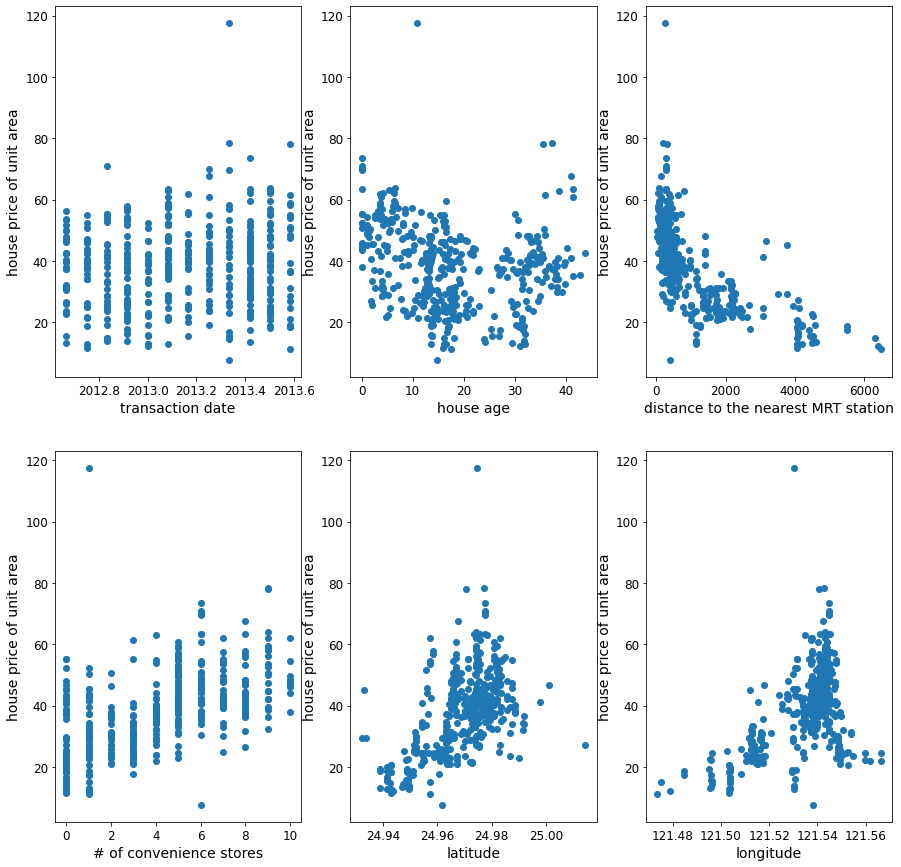

In [8]:
x1 = r_estate['X1 transaction date']
x2 = r_estate['X2 house age']
x3 = r_estate['X3 distance to the nearest MRT station']
x4 = r_estate['X4 number of convenience stores']
x5 = r_estate['X5 latitude']
x6 = r_estate['X6 longitude']
y1 = r_estate['Y house price of unit area']

plt.figure(figsize = (15, 15))

plt.subplot(2,3,1)
plt.scatter(x1, y1)
plt.xlabel('transaction date')
plt.ylabel('house price of unit area')

plt.subplot(2,3,2)
plt.scatter(x2, y1)
plt.xlabel('house age')
plt.ylabel('house price of unit area')

plt.subplot(2,3,3)
plt.scatter(x3, y1)
plt.xlabel('distance to the nearest MRT station')
plt.ylabel('house price of unit area')

plt.subplot(2,3,4)
plt.scatter(x4, y1)
plt.xlabel('# of convenience stores')
plt.ylabel('house price of unit area')

plt.subplot(2,3,5)
plt.scatter(x5, y1)
plt.xlabel('latitude')
plt.ylabel('house price of unit area')

plt.subplot(2,3,6)
plt.scatter(x6, y1)
plt.xlabel('longitude')
plt.ylabel('house price of unit area')

plt.show()

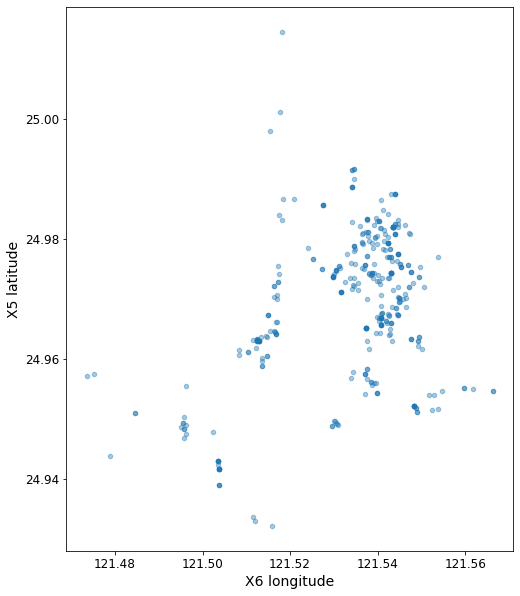

In [9]:
r_estate.plot(kind="scatter", y="X5 latitude", x="X6 longitude", alpha=0.4,figsize = (8,10))
plt.show()

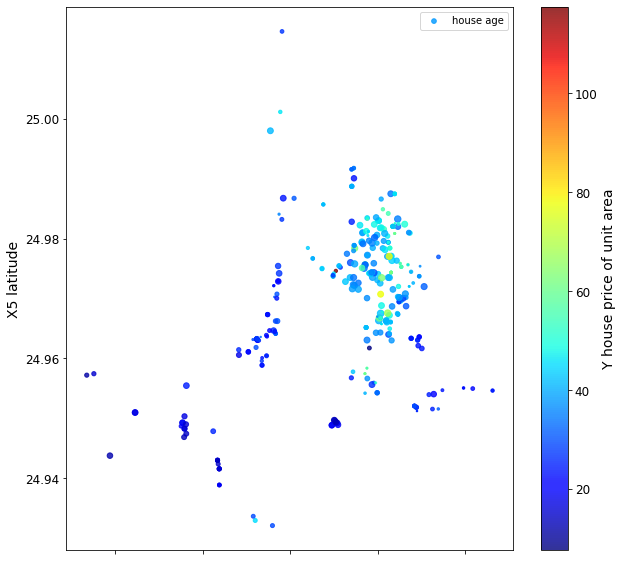

In [10]:
r_estate.plot(kind="scatter", x="X6 longitude", y="X5 latitude", alpha=0.8,
    s=r_estate["X2 house age"], label="house age", figsize=(10,10),
    c="Y house price of unit area",cmap=plt.get_cmap("jet"), colorbar=True)

plt.legend()
plt.show()

In [11]:
corr_matrix = r_estate.corr()
corr_matrix

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X1 transaction date,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


<AxesSubplot:>

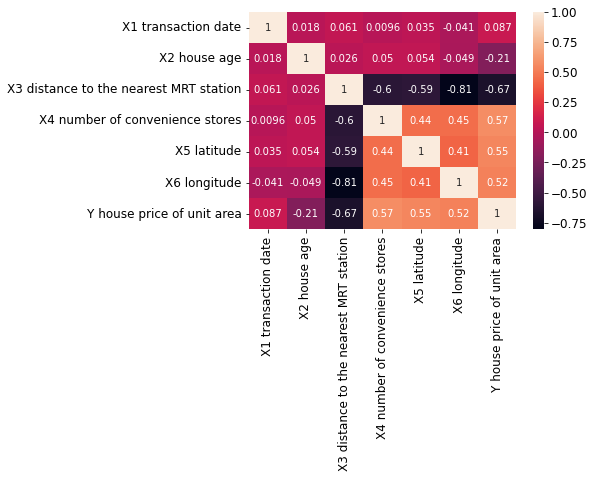

In [12]:
import seaborn as sns
sns.heatmap(r_estate.corr(),annot=True)

# 2.prepare data for machine learning

In [13]:
r_estate

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6


In [14]:
r_estate.dtypes


X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

In [15]:
r_estate_labels=r_estate["Y house price of unit area"].copy()
r_estate = r_estate.drop("Y house price of unit area", axis=1)


In [16]:
r_estate.isnull().sum()  #we don't have missing data ,that's great!


X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
dtype: int64

In [17]:
r_estate.shape


(414, 6)

# 2.1Transformation Pipelines

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler


In [19]:
num_pipeline = Pipeline([      
        ('std_scaler', StandardScaler())
        ])                                     #this step to make the data set as scaler

In [20]:
r_estate_prepared = num_pipeline.fit_transform(r_estate)


In [21]:
r_estate_prepared.shape


(414, 6)

In [22]:
type(r_estate_prepared)


numpy.ndarray

In [23]:
r_estate_prepared = pd.DataFrame(r_estate_prepared, columns = r_estate.columns)


In [24]:
r_estate_prepared.isnull().sum()   #this step to check prepared data has no missing value.


X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
dtype: int64

In [25]:
r_estate_prepared.describe()   #this table shows the std value is almost 1, the min value is near 0.


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
count,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02
mean,3.705656e-13,-6.704245e-17,-1.161175e-16,-1.072679e-18,1.343228e-13,-1.614546e-12
std,1.001210e+00,1.001210e+00,1.001210e+00,1.001210e+00,1.001210e+00,1.001210e+00
min,-1.711384e+00,-1.556639e+00,-8.412787e-01,-1.391638e+00,-2.981805e+00,-3.903223e+00
25%,-8.236832e-01,-7.634921e-01,-6.303115e-01,-1.051734e+00,-4.864845e-01,-3.441981e-01
50%,6.401736e-02,-1.417172e-01,-4.693493e-01,-3.202000e-02,1.669943e-01,3.437301e-01
75%,9.517179e-01,9.172774e-01,2.938267e-01,6.477891e-01,6.796928e-01,6.487148e-01
max,1.541151e+00,2.292652e+00,4.287008e+00,2.007407e+00,3.675611e+00,2.146891e+00


In [26]:
type(r_estate_labels)

pandas.core.series.Series

In [27]:
type(r_estate_prepared)

pandas.core.frame.DataFrame

In [28]:
r_estate_labels=r_estate_labels.to_numpy()

 # 2.1.1linear regression (just use the orginal data set)

## we can see the tables below:
 ### the R-suqared value is 0.582 and the p value which >0.05 is only the x6 column, the results is not bad!
 ### but this result is not the real one,because we use orginal data set. this is not the final results.
 ### let's do something that shows the real results.

In [29]:
import statsmodels.api as sm
X_const = sm.add_constant(r_estate_prepared)
OLS_model = sm.OLS(r_estate_labels,X_const)
lr_fit = OLS_model.fit()
lr_fit.summary2()



<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Ordinary least squares
======================================================================================
Model:                      OLS                    Adj. R-squared:           0.576    
Dependent Variable:         y                      AIC:                      2987.9241
Date:                       2022-11-08 11:52       BIC:                      3016.1052
No. Observations:           414                    Log-Likelihood:           -1487.0  
Df Model:                   6                      F-statistic:              94.59    
Df Residuals:               407                    Prob (F-statistic):       4.86e-74 
R-squared:                  0.582                  Scale:                    78.458   
--------------------------------------------------------------------------------------
                                        Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
--------------------------------------------------------------------------------------
const                                  37.9802   0.4353 87.2445 0.0000 37.1244 38.8360
X1 transaction date                     1.4493   0.4385  3.3051 0.0010  0.5873  2.3113
X2 house age                           -3.0688   0.4384 -6.9995 0.0000 -3.9307 -2.2069
X3 distance to the nearest MRT station -5.6568   0.9051 -6.2497 0.0000 -7.4361 -3.8775
X4 number of convenience stores         3.3341   0.5536  6.0228 0.0000  2.2459  4.4223
X5 latitude                             2.7948   0.5524  5.0592 0.0000  1.7088  3.8807
X6 longitude                           -0.1904   0.7447 -0.2557 0.7983 -1.6544  1.2735
--------------------------------------------------------------------------------------
Omnibus:                    231.634             Durbin-Watson:                2.153   
Prob(Omnibus):              0.000               Jarque-Bera (JB):             3599.138
Skew:                       2.026               Prob(JB):                     0.000   
Kurtosis:                   16.865              Condition No.:                4       
======================================================================================

"""

In [30]:
r_estate_prepared.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,-0.823683,1.255628,-0.792495,2.007407,1.125430,0.448762
1,-0.823683,0.157086,-0.616612,1.667503,0.912444,0.401139
2,1.541151,-0.387791,-0.414015,0.307885,1.486860,0.688183
3,1.246435,-0.387791,-0.414015,0.307885,1.486860,0.688183
4,-1.121951,-1.117223,-0.549997,0.307885,0.834188,0.592937


# use PCA to reduce dimension, extract info and, solve multicollinearity

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

r_estate_prepared_VIF = {}

for i in range(r_estate_prepared.shape[1]):
    r_estate_prepared_VIF[r_estate_prepared.columns[i]] = variance_inflation_factor(r_estate_prepared.values, i)

In [32]:
r_estate_prepared_VIF

{'X1 transaction date': 1.0146736235676819,
 'X2 house age': 1.0142867648104992,
 'X3 distance to the nearest MRT station': 4.323019469033114,
 'X4 number of convenience stores': 1.617037748505585,
 'X5 latitude': 1.6102343933412469,
 'X6 longitude': 2.926302102890358}

In [33]:
from sklearn.decomposition import PCA, KernelPCA
pca = PCA(n_components = None) 
pca.fit(r_estate_prepared)

PCA()

In [34]:
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Variances (Percentage):
[44.57320963 17.4571358  16.38282284  9.92428447  9.1603346   2.50221266]



In [35]:
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Cumulative Variances (Percentage):
[ 44.57320963  62.03034543  78.41316827  88.33745275  97.49778734
 100.        ]



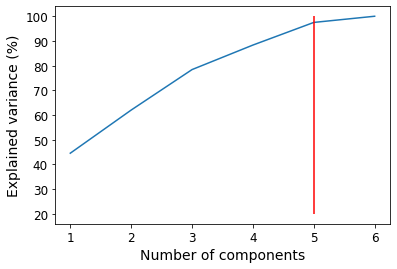

In [36]:
components =  None
components = len(pca.explained_variance_ratio_) if components is None else components
plt.plot(range(1,components+1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")
plt.vlines(x = 5, ymin = 20, ymax = 100, color = "red")

### we use pca to transform r_estate_prepared as r_estate_in data set.

In [37]:
r_estate_in = pd.DataFrame(pca.transform(r_estate_prepared), columns = ["comp_" + str(i) for i in range(len(r_estate_prepared.columns))]).iloc[:, :6]
print(r_estate_in.shape)
r_estate.head()

(414, 6)


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
No,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024
2,2012.917,19.5,306.59470,9,24.98034,121.53951
3,2013.583,13.3,561.98450,5,24.98746,121.54391
4,2013.500,13.3,561.98450,5,24.98746,121.54391
5,2012.833,5.0,390.56840,5,24.97937,121.54245


In [38]:
r_estate_prepared_VIF = {}

for i in range(r_estate_in.shape[1]):
    r_estate_prepared_VIF[r_estate_in.columns[i]] = variance_inflation_factor(r_estate_in.values, i)

In [39]:
r_estate_prepared_VIF

{'comp_0': 1.0000000000000004,
 'comp_1': 1.0000000000000002,
 'comp_2': 0.9999999999999998,
 'comp_3': 0.9999999999999996,
 'comp_4': 1.0000000000000004,
 'comp_5': 0.9999999999999991}

### the results show no difference between the orginal one.

In [40]:
import statsmodels.api as sm
X_const = sm.add_constant(r_estate_in)
OLS_model = sm.OLS(r_estate_labels, X_const)
lr_fit = OLS_model.fit()
lr_fit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.576    
Dependent Variable: y                AIC:                2987.9241
Date:               2022-11-08 11:52 BIC:                3016.1052
No. Observations:   414              Log-Likelihood:     -1487.0  
Df Model:           6                F-statistic:        94.59    
Df Residuals:       407              Prob (F-statistic): 4.86e-74 
R-squared:          0.582            Scale:              78.458   
--------------------------------------------------------------------
           Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const     37.9802     0.4353    87.2445   0.0000   37.1244   38.8360
comp_0    -5.8785     0.2662   -22.0831   0.0000   -6.4018   -5.3552
comp_1     0.8959     0.4254     2.1061   0.0358    0.0597    1.7320
comp_2    -3.0780     0.4391    -7.0099   0.0000   -3.9411   -2.2148
comp_3     2.0569     0.5641     3.6460   0.0003    0.9479    3.1659
comp_4    -1.0639     0.5872    -1.8119   0.0707   -2.2183    0.0904
comp_5    -3.5050     1.1235    -3.1196   0.0019   -5.7136   -1.2964
------------------------------------------------------------------
Omnibus:              231.634      Durbin-Watson:         2.153   
Prob(Omnibus):        0.000        Jarque-Bera (JB):      3599.138
Skew:                 2.026        Prob(JB):              0.000   
Kurtosis:             16.865       Condition No.:         4       
==================================================================

"""

# let split data as training sets and test sets to see the final results(standard linear regression)

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(r_estate_in, r_estate_labels, test_size=0.2, random_state=1234) 

In [42]:
X_train.shape

(331, 6)

# Machine learning 
 ## tree base regression

In [44]:
r_estate_labels.shape

(414,)

In [45]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(r_estate_in, r_estate_labels)

DecisionTreeRegressor(random_state=42)

In [46]:
r_estate_predictions = tree_reg.predict(r_estate_in)
tree_mse = mean_squared_error(r_estate_labels, r_estate_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.7815659988945395

In [47]:
r_estate_predictions[:10]

array([37.9, 42.2, 47.3, 54.8, 43.1, 32.1, 40.3, 46.7, 18.8, 22.1])

In [48]:
mean_absolute_percentage_error(r_estate_labels, r_estate_predictions)

0.5183839559915354

In [49]:
lr_predictions = lr_fit.predict(sm.add_constant(X_test))
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_rmse = np.sqrt(lr_mse)
lr_rmse

10.77521056995751

# Attention ,this is the real predictions results!!!!

## we can see the results is 0.46 by using standard linear regression!

In [53]:
from sklearn.metrics import r2_score

In [54]:
lr_r2 = r2_score(y_test, lr_predictions)
print('Testing performance:')
print('R2: {:.2f}'.format(lr_r2))

Testing performance:
R2: 0.46


# Random Forest Regresson

In [55]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=50, random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

# the r2_score by using training set is 0.95,means it has over fitting problem.

In [69]:
r_estate_predictions1 = forest_reg.predict(X_train)
forest_mse = mean_squared_error(y_train, r_estate_predictions1)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

2.8771100389920115

In [59]:
rf_r2_1 = r2_score(y_train, r_estate_predictions1)
print('Testing performance:')
print('R2: {:.2f}'.format(rf_r2_1))

Testing performance:
R2: 0.95


# The random forest regression values below:

In [70]:
r_estate_predictions = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, r_estate_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

9.815679378202134

In [71]:
rf_r2 = r2_score(y_test, r_estate_predictions)
print('Testing performance:')
print('R2: {:.2f}'.format(rf_r2))

Testing performance:
R2: 0.55


# CatBoost Regressor
### let's try catboost to see the results

In [72]:
!pip install catboost

In [73]:
import catboost as cb

In [74]:
train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)

In [75]:
cb_reg = cb.CatBoostRegressor(loss_function='RMSE', silent=True)

In [76]:
grid = {'iterations': [50, 100],
        'learning_rate': [0.01, 0.05, 0.1],
        'depth': [2, 4, 8],
        'l2_leaf_reg': [0.5, 5, 50]
        }
cb_reg.grid_search(grid, train_dataset, verbose = False)


bestTest = 28.34593089
bestIteration = 49


bestTest = 11.21917485
bestIteration = 49


bestTest = 9.213680511
bestIteration = 49


bestTest = 28.89728265
bestIteration = 49


bestTest = 11.4917398
bestIteration = 49


bestTest = 9.383516784
bestIteration = 49


bestTest = 32.24233245
bestIteration = 49


bestTest = 14.182986
bestIteration = 49


bestTest = 10.22793217
bestIteration = 49


bestTest = 20.16697906
bestIteration = 99


bestTest = 9.24202287
bestIteration = 99


bestTest = 8.488324374
bestIteration = 99


bestTest = 20.8008536
bestIteration = 99


bestTest = 9.451842995
bestIteration = 98


bestTest = 8.722224227
bestIteration = 96


bestTest = 25.26197523
bestIteration = 99


bestTest = 10.23624014
bestIteration = 99


bestTest = 9.376120142
bestIteration = 99


bestTest = 28.0158532
bestIteration = 49


bestTest = 10.85131587
bestIteration = 49


bestTest = 9.026099267
bestIteration = 49


bestTest = 29.37184426
bestIteration = 49


bestTest = 11.64157536
bestIteration 

{'params': {'depth': 4,
  'iterations': 100,
  'learning_rate': 0.1,
  'l2_leaf_reg': 0.5},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               4

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [78]:
pred = cb_reg.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print('Testing performance:')
print('RMSE: {:.2f}'.format(rmse)) 
print('R2: {:.2f}'.format(r2))

Testing performance:
RMSE: 9.90
R2: 0.54


## conclusion: the results show that there is no big difference between the catboost and random forest regression in this case 0.55/0.54